In [7]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
from visualize_training.hmm import HMM
from visualize_training.visualize import visualize_dag, visualize_avg_log_likelihood, visualize_hmm_loss
from visualize_training.utils import training_run_json_to_csv, save_model, munge_data
pd.set_option('display.max_rows', 500)

In [8]:
parent_dir = "all_metrics"

In [9]:
parent_dir

'all_metrics'

In [10]:
def pizza_clock_plot(attn, parent_dir):
    
    seed_0 = pd.read_csv(parent_dir + f"/modular_clock_pizza_run_{attn}/lr0.001_adamw_seed0_scaling1.0.csv")
    seed_1 = pd.read_csv(parent_dir + f"/modular_clock_pizza_run_{attn}/lr0.001_adamw_seed1_scaling1.0.csv")
    seed_2 = pd.read_csv(parent_dir + f"/modular_clock_pizza_run_{attn}/lr0.001_adamw_seed2_scaling1.0.csv")
    seed_3 = pd.read_csv(parent_dir + f"/modular_clock_pizza_run_{attn}/lr0.001_adamw_seed3_scaling1.0.csv")
    
    avg_grad_sym = (seed_0['grad_sym'] + seed_1['grad_sym'] + seed_2['grad_sym'] + seed_3['grad_sym'])/4
    avg_dist_irr = (seed_0['dist_irr'] + seed_1['dist_irr'] + seed_2['dist_irr'] + seed_3['dist_irr'])/4
    avg_eval_loss = (seed_0['eval_loss'] +seed_1['eval_loss'] + seed_2['eval_loss'] + seed_3['eval_loss'])/4
    
    pizza_clock_labels = pizza_clock_classification(avg_grad_sym,avg_dist_irr)
    
    fig, axs = plt.subplots(nrows=1, ncols=2,figsize=(15, 7))
    ax2 = axs[0].twinx()
    axs[0].plot(seed_0['epoch'], avg_grad_sym, 'g-', label = "grad_sym")
    axs[0].plot(seed_0['epoch'], avg_dist_irr, 'b-', label = "dist_irr")
    ax2.plot(seed_0['epoch'], avg_eval_loss, 'r-', label = "eval_loss")

    axs[0].set_xlabel("Epoch")
    axs[0].set_ylabel("grad sym / dist irr")
    ax2.set_ylabel("eval loss")
    axs[0].legend()
    plt.title(f"attention = {attn}")
    
    
    # fig, ax3 = plt.subplots()
    axs[1].scatter(avg_dist_irr, avg_grad_sym)
    axs[1].set_xlabel("dist_irr")
    axs[1].set_ylabel("grad sym")
    plt.show()
    
def pizza_clock_classification(grad_sym_list, dist_irr_list, grad_sym_thresh=0.8, dist_irr_thresh=0.6):
    
    final_output = np.where(grad_sym_list>=grad_sym_thresh,"pizza",
                            np.where(dist_irr_list >=dist_irr_thresh,"clock",
                                     "pizza"))
    
    return final_output

### Pizza Clock Scatter Plots

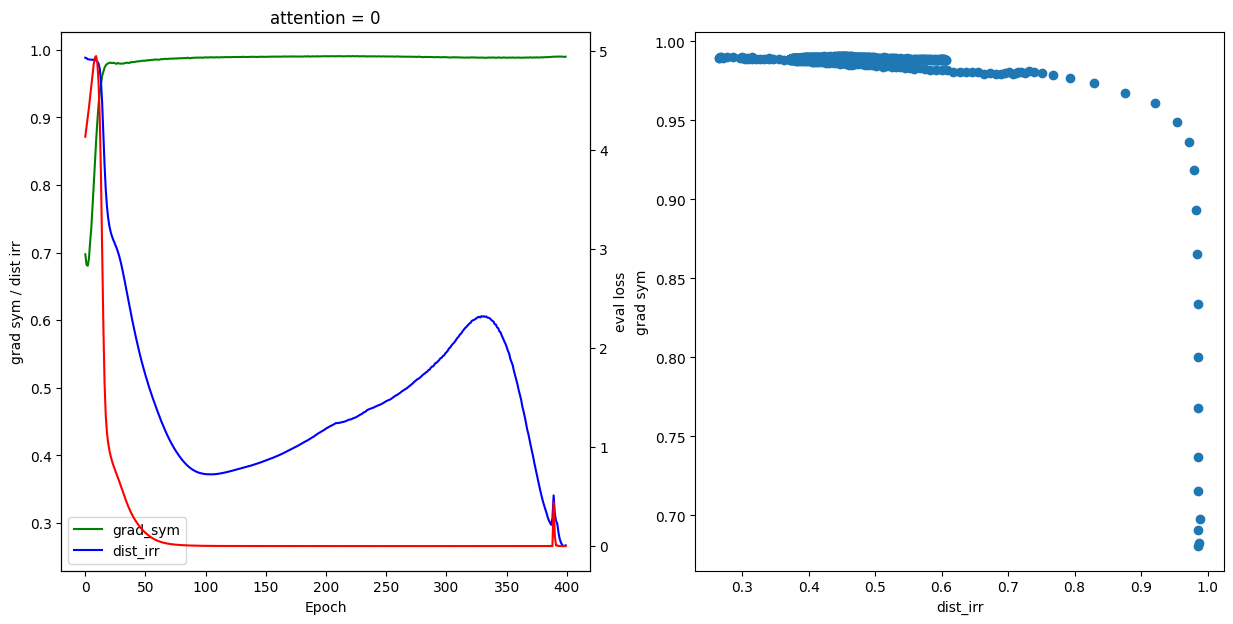

In [398]:
pizza_clock_plot('0',parent_dir)

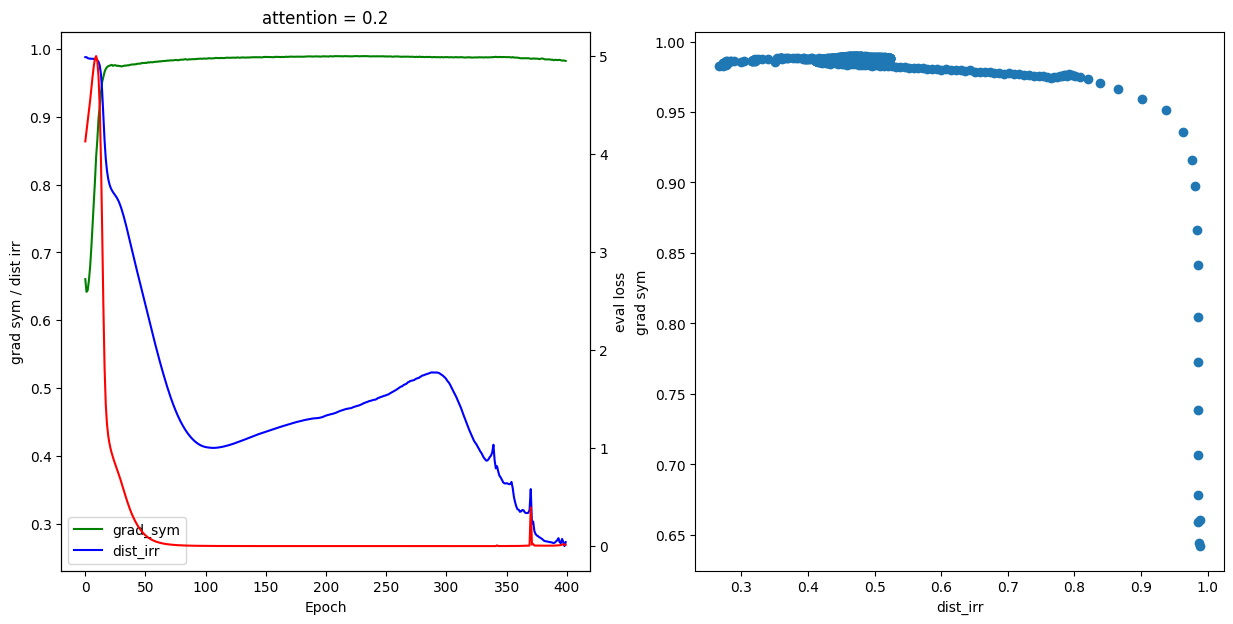

In [53]:
pizza_clock_plot("0.2",parent_dir)

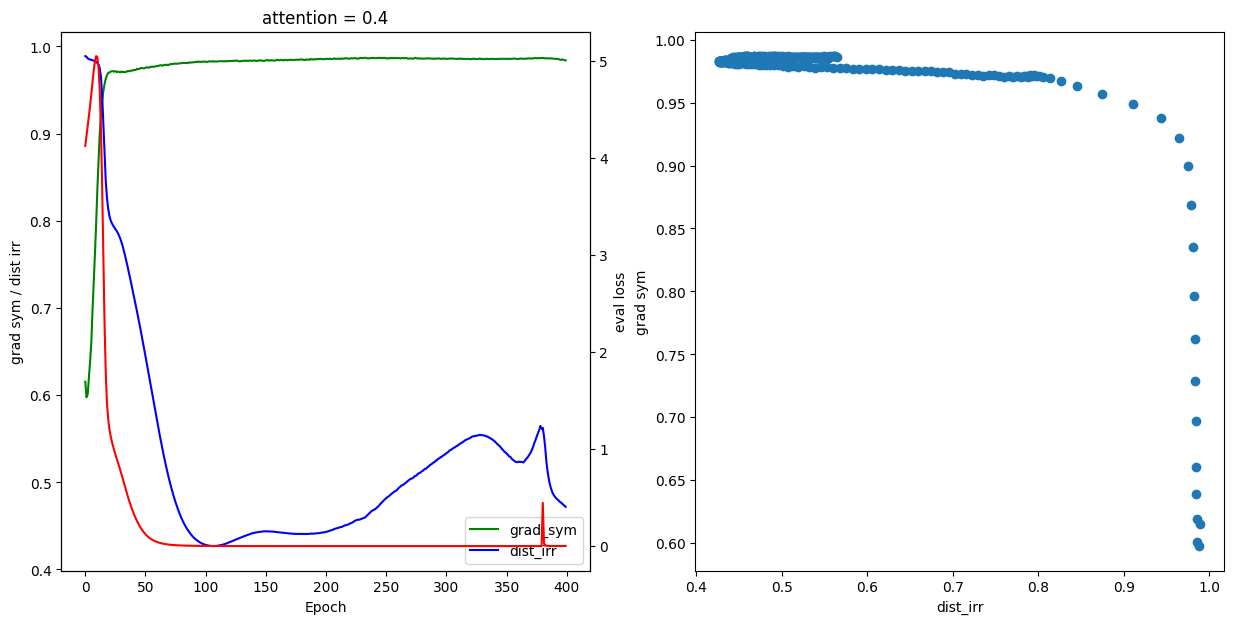

In [54]:
pizza_clock_plot("0.4",parent_dir)

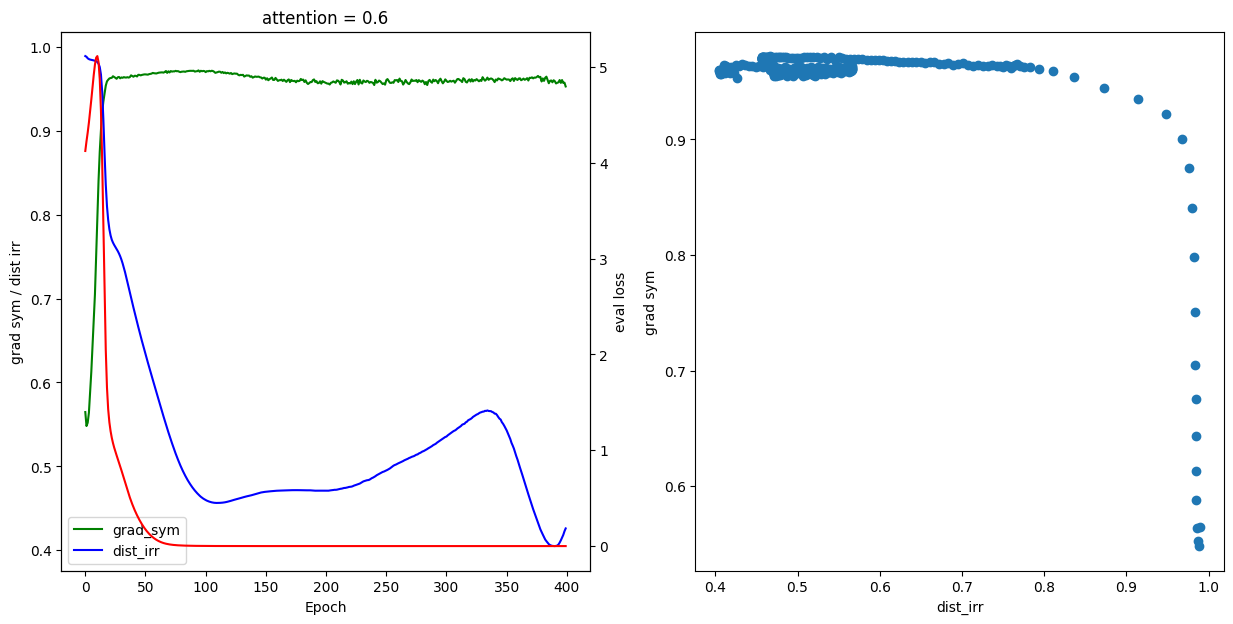

In [55]:
pizza_clock_plot("0.6",parent_dir)

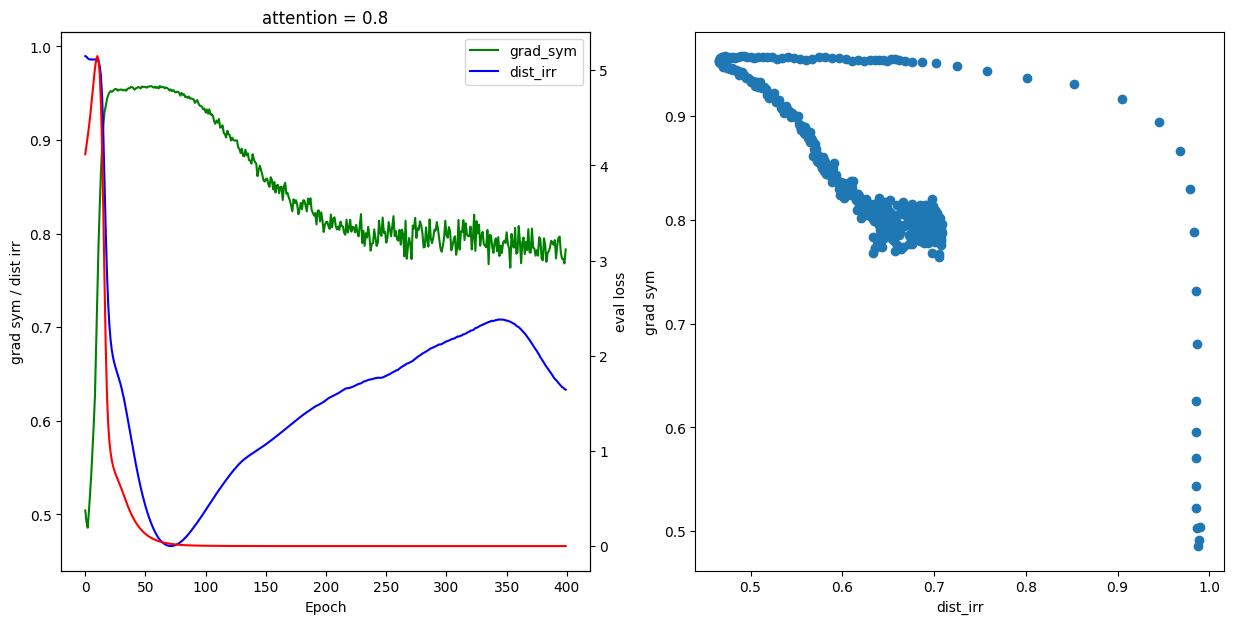

In [56]:
pizza_clock_plot("0.8",parent_dir)

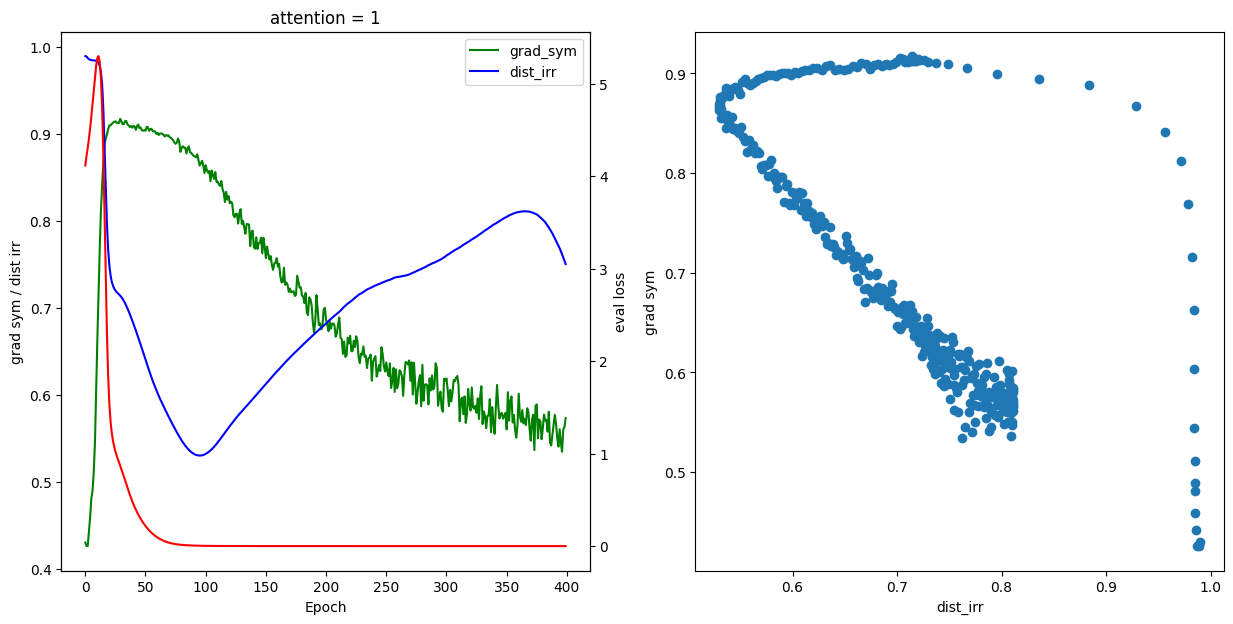

In [57]:
pizza_clock_plot("1",parent_dir)

- if grad sym is more than 0.8, its a pizza
- if grad sym less than 0.8, check for dist irr, if its more than 0.6, then its a clock
- if dist irr less than 0.6, its a pizza

### model with all metrics, attention = 0

In [58]:
max_components = 8
cov_type = "diag"
n_seeds = 4
n_iter = 100
attn = 0
cols = ['l1', 'l2', 'trace', 'spectral', 'code_sparsity',
       'computational_sparsity', 'mean_lambda', 'variance_lambda', 'mean_w',
       'median_w', 'var_w', 'mean_b', 'median_b', 'var_b','grad_sym',
       'dist_irr', 'train_loss', 'eval_loss', 'train_accuracy',
       'eval_accuracy']

first_n = 400
hmm_model = HMM(max_components, cov_type, n_seeds, n_iter)
data_dir = parent_dir + f"/modular_clock_pizza_run_{attn}/"
hmm_output = hmm_model.get_avg_log_likelihood(data_dir, cols)

visualize_avg_log_likelihood(hmm_output,"all_cols - modular_clock_pizza_run_0")

model_path = data_dir + '/model_all_metrics'
save_model(model_path,hmm_output)

n_components = 2
model_path = data_dir + '/model_all_metrics.pkl'
model, data, best_predictions, lengths = munge_data(hmm_model, model_path, data_dir, cols, n_components)

phases = list(set(hmm_model.best_model.predict(data, lengths=lengths)))
state_transitions = hmm_model.feature_importance(cols, data, best_predictions,phases,lengths)
best_model_transmat = model.transmat_

visualize_dag(best_model_transmat, edge_hover_dict = state_transitions)

all_metrics/modular_clock_pizza_run_0/
['all_metrics/modular_clock_pizza_run_0/lr0.001_adamw_seed2_scaling1.0.csv', 'all_metrics/modular_clock_pizza_run_0/lr0.001_adamw_seed3_scaling1.0.csv', 'all_metrics/modular_clock_pizza_run_0/lr0.001_adamw_seed1_scaling1.0.csv', 'all_metrics/modular_clock_pizza_run_0/lr0.001_adamw_seed0_scaling1.0.csv']


100%|██████████| 8/8 [00:24<00:00,  3.06s/it]


all_metrics/modular_clock_pizza_run_0/
['all_metrics/modular_clock_pizza_run_0/lr0.001_adamw_seed2_scaling1.0.csv', 'all_metrics/modular_clock_pizza_run_0/lr0.001_adamw_seed3_scaling1.0.csv', 'all_metrics/modular_clock_pizza_run_0/lr0.001_adamw_seed1_scaling1.0.csv', 'all_metrics/modular_clock_pizza_run_0/lr0.001_adamw_seed0_scaling1.0.csv']
-8534.76411153771


In [59]:
hmm_model.best_model

GaussianHMM(n_components=2, n_iter=100)

In [60]:
hmm_output['bics']

[22942.675113436853,
 7480.360854753942,
 16294.614717298035,
 20183.581106255457,
 20518.879769571904,
 22315.778996801066,
 31544.590572091958,
 19596.001284094433]

In [61]:
random_seed = 0
optimizer = "adamw"
lr = 0.001
scaling = 1.0
attn = 0
data_dir = parent_dir + f"/modular_clock_pizza_run_{attn}/"


training_run = pd.read_csv(f'{data_dir}lr{lr}_{optimizer}_seed{random_seed}_scaling{scaling}.csv')
data  = np.apply_along_axis(zscore, 0, training_run[cols].to_numpy())
training_run['phases']= hmm_output['best_models'][1].predict(data) + 1
# training_run['phases']= hmm_model.best_model.predict(data)

visualize_hmm_loss(training_run,phase_col = 'phases', epoch_col='epoch', loss_col='l2')

In [62]:
visualize_hmm_loss(training_run,phase_col = 'phases', epoch_col='epoch', loss_col='dist_irr')

In [63]:
visualize_hmm_loss(training_run,phase_col = 'phases', epoch_col='epoch', loss_col='grad_sym')

In [64]:
visualize_hmm_loss(training_run,phase_col = 'phases', epoch_col='epoch', loss_col='eval_loss')

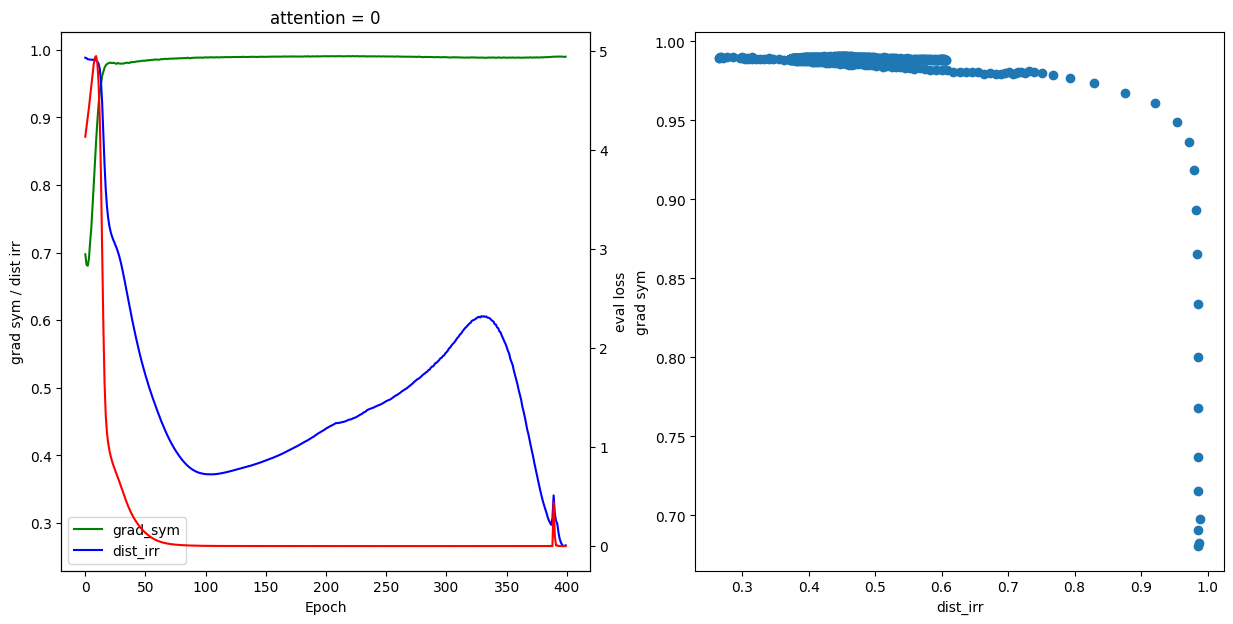

In [65]:
pizza_clock_plot('0',parent_dir)

### Model with old metrics without pizza clock metrics, attention = 0

In [131]:
max_components = 8
cov_type = "diag"
n_seeds = 4
n_iter = 100
attn = 0
cols = ['l1', 'l2', 'trace', 'spectral', 'code_sparsity',
       'computational_sparsity', 'mean_lambda', 'variance_lambda', 'mean_w',
       'median_w', 'var_w', 'mean_b', 'median_b', 'var_b', 'train_loss', 'eval_loss', 'train_accuracy',
       'eval_accuracy']

first_n = 400
hmm_model = HMM(max_components, cov_type, n_seeds, n_iter)
data_dir = parent_dir + f"/modular_clock_pizza_run_{attn}/"
hmm_output = hmm_model.get_avg_log_likelihood(data_dir, cols)

visualize_avg_log_likelihood(hmm_output,"old metrics - modular_clock_pizza_run_0")

# model_path = data_dir + '/model_old_metrics'
# save_model(model_path,hmm_output)

all_metrics/modular_clock_pizza_run_0/
['all_metrics/modular_clock_pizza_run_0/lr0.001_adamw_seed2_scaling1.0.csv', 'all_metrics/modular_clock_pizza_run_0/lr0.001_adamw_seed3_scaling1.0.csv', 'all_metrics/modular_clock_pizza_run_0/lr0.001_adamw_seed1_scaling1.0.csv', 'all_metrics/modular_clock_pizza_run_0/lr0.001_adamw_seed0_scaling1.0.csv']


 50%|█████     | 4/8 [00:01<00:01,  2.42it/s]Model is not converging.  Current: 7336.862109473257 is not greater than 7336.862703195957. Delta is -0.0005937226997048128
Model is not converging.  Current: 7336.83519067393 is not greater than 7336.835655060279. Delta is -0.00046438634944934165
100%|██████████| 8/8 [00:05<00:00,  1.34it/s]


### model with l1, l2 and pizza clock metrics, attention = 0

In [16]:
max_components = 8
cov_type = "diag"
n_seeds = 4
n_iter = 10
attn = 0
# cols = ['l1', 'l2','grad_sym',
#        'dist_irr']
cols = ['l1', 'l2',  'train_loss', 'train_accuracy',
       'eval_accuracy', "grad_sym", "eval_loss"]

first_n = 400
hmm_model = HMM(max_components, cov_type, n_seeds, n_iter)
data_dir = parent_dir + f"/modular_clock_pizza_run_{attn}/"
hmm_output = hmm_model.get_avg_log_likelihood(data_dir, cols)

visualize_avg_log_likelihood(hmm_output,"select cols - modular_clock_pizza_run_0")

# model_path = data_dir + '/model_select_metrics'
# save_model(model_path,hmm_output)

all_metrics/modular_clock_pizza_run_0/
['all_metrics/modular_clock_pizza_run_0/lr0.001_adamw_seed2_scaling1.0.csv', 'all_metrics/modular_clock_pizza_run_0/lr0.001_adamw_seed3_scaling1.0.csv', 'all_metrics/modular_clock_pizza_run_0/lr0.001_adamw_seed1_scaling1.0.csv', 'all_metrics/modular_clock_pizza_run_0/lr0.001_adamw_seed0_scaling1.0.csv']


100%|██████████| 8/8 [00:00<00:00,  8.68it/s]


In [401]:
hmm_model.best_model

GaussianHMM(n_components=8)

In [402]:
hmm_output['best_models'][2]

GaussianHMM(n_components=2)

In [403]:
n_components = 2
model_path = data_dir + '/model_select_metrics.pkl'
model, data, best_predictions, lengths = munge_data(hmm_model, model_path, data_dir, cols, n_components)

phases = list(set(hmm_output['best_models'][2].predict(data, lengths=lengths)))
state_transitions = hmm_model.feature_importance(cols, data, best_predictions,phases,lengths)
best_model_transmat = model.transmat_

visualize_dag(best_model_transmat, edge_hover_dict = state_transitions)

all_metrics/modular_clock_pizza_run_0/
['all_metrics/modular_clock_pizza_run_0/lr0.001_adamw_seed2_scaling1.0.csv', 'all_metrics/modular_clock_pizza_run_0/lr0.001_adamw_seed3_scaling1.0.csv', 'all_metrics/modular_clock_pizza_run_0/lr0.001_adamw_seed1_scaling1.0.csv', 'all_metrics/modular_clock_pizza_run_0/lr0.001_adamw_seed0_scaling1.0.csv']
10178.647936803693


In [408]:
random_seed = 0
optimizer = "adamw"
lr = 0.001
scaling = 1.0
attn = 0
data_dir = parent_dir + f"/modular_clock_pizza_run_{attn}/"


training_run = pd.read_csv(f'{data_dir}lr{lr}_{optimizer}_seed{random_seed}_scaling{scaling}.csv')
data  = np.apply_along_axis(zscore, 0, training_run[cols].to_numpy())
training_run['phases']= hmm_output['best_models'][2].predict(data) + 1
training_run['pizza_clock_labels'] = pizza_clock_classification(training_run['grad_sym'], training_run['dist_irr'])
# training_run['phases']= hmm_model.best_model.predict(data)

visualize_hmm_loss(training_run,phase_col = 'phases', epoch_col='epoch', loss_col='l2')
visualize_hmm_loss(training_run,phase_col = 'pizza_clock_labels', epoch_col='epoch', loss_col='l2')

In [407]:
visualize_hmm_loss(training_run,phase_col = 'phases', epoch_col='epoch', loss_col='eval_accuracy')
visualize_hmm_loss(training_run,phase_col = 'pizza_clock_labels', epoch_col='epoch', loss_col='eval_accuracy')

In [409]:
visualize_hmm_loss(training_run,phase_col = 'phases', epoch_col='epoch', loss_col='train_accuracy')
visualize_hmm_loss(training_run,phase_col = 'pizza_clock_labels', epoch_col='epoch', loss_col='train_accuracy')

In [410]:
visualize_hmm_loss(training_run,phase_col = 'phases', epoch_col='epoch', loss_col='grad_sym')
visualize_hmm_loss(training_run,phase_col = 'pizza_clock_labels', epoch_col='epoch', loss_col='grad_sym')

### model with attention = 0.2

In [412]:
max_components = 8
cov_type = "diag"
n_seeds = 4
n_iter = 10
attn = 0.2


cols = ['l1', 'l2','mean_lambda', 'var_w', 'grad_sym',
        'train_loss',  'train_accuracy']

first_n = 400
hmm_model = HMM(max_components, cov_type, n_seeds, n_iter)
data_dir = parent_dir + f"/modular_clock_pizza_run_{attn}/"
hmm_output = hmm_model.get_avg_log_likelihood(data_dir, cols)

visualize_avg_log_likelihood(hmm_output,"select cols - modular_clock_pizza_run_0.2")

model_path = data_dir + '/model_select_metrics'
save_model(model_path,hmm_output)

all_metrics/modular_clock_pizza_run_0.2/
['all_metrics/modular_clock_pizza_run_0.2/lr0.001_adamw_seed2_scaling1.0.csv', 'all_metrics/modular_clock_pizza_run_0.2/lr0.001_adamw_seed3_scaling1.0.csv', 'all_metrics/modular_clock_pizza_run_0.2/lr0.001_adamw_seed1_scaling1.0.csv', 'all_metrics/modular_clock_pizza_run_0.2/lr0.001_adamw_seed0_scaling1.0.csv']


100%|██████████| 8/8 [00:00<00:00,  8.32it/s]


In [413]:
hmm_model.best_model

GaussianHMM(n_components=8)

In [414]:
n_components = 8
model_path = data_dir + '/model_select_metrics.pkl'
model, data, best_predictions, lengths = munge_data(hmm_model, model_path, data_dir, cols, n_components)

phases = list(set(hmm_model.best_model.predict(data, lengths=lengths)))
state_transitions = hmm_model.feature_importance(cols, data, best_predictions,phases,lengths)
best_model_transmat = model.transmat_

visualize_dag(best_model_transmat, edge_hover_dict = state_transitions)

all_metrics/modular_clock_pizza_run_0.2/
['all_metrics/modular_clock_pizza_run_0.2/lr0.001_adamw_seed2_scaling1.0.csv', 'all_metrics/modular_clock_pizza_run_0.2/lr0.001_adamw_seed3_scaling1.0.csv', 'all_metrics/modular_clock_pizza_run_0.2/lr0.001_adamw_seed1_scaling1.0.csv', 'all_metrics/modular_clock_pizza_run_0.2/lr0.001_adamw_seed0_scaling1.0.csv']
15448.645630176263


In [415]:
random_seed = 0
optimizer = "adamw"
lr = 0.001
scaling = 1.0
attn = 0.2
data_dir = parent_dir + f"/modular_clock_pizza_run_{attn}/"


training_run = pd.read_csv(f'{data_dir}lr{lr}_{optimizer}_seed{random_seed}_scaling{scaling}.csv')
data  = np.apply_along_axis(zscore, 0, training_run[cols].to_numpy())
training_run['phases']= hmm_model.best_model.predict(data) + 1
training_run['pizza_clock_labels'] = pizza_clock_classification(training_run['grad_sym'], training_run['dist_irr'])
# training_run['phases']= hmm_model.best_model.predict(data)

visualize_hmm_loss(training_run,phase_col = 'phases', epoch_col='epoch', loss_col='l2')

In [416]:
visualize_hmm_loss(training_run,phase_col = 'phases', epoch_col='epoch', loss_col='train_accuracy')
visualize_hmm_loss(training_run,phase_col = 'pizza_clock_labels', epoch_col='epoch', loss_col='train_accuracy')

In [393]:
visualize_hmm_loss(training_run,phase_col = 'phases', epoch_col='epoch', loss_col='grad_sym')
visualize_hmm_loss(training_run,phase_col = 'phases', epoch_col='epoch', loss_col='dist_irr')

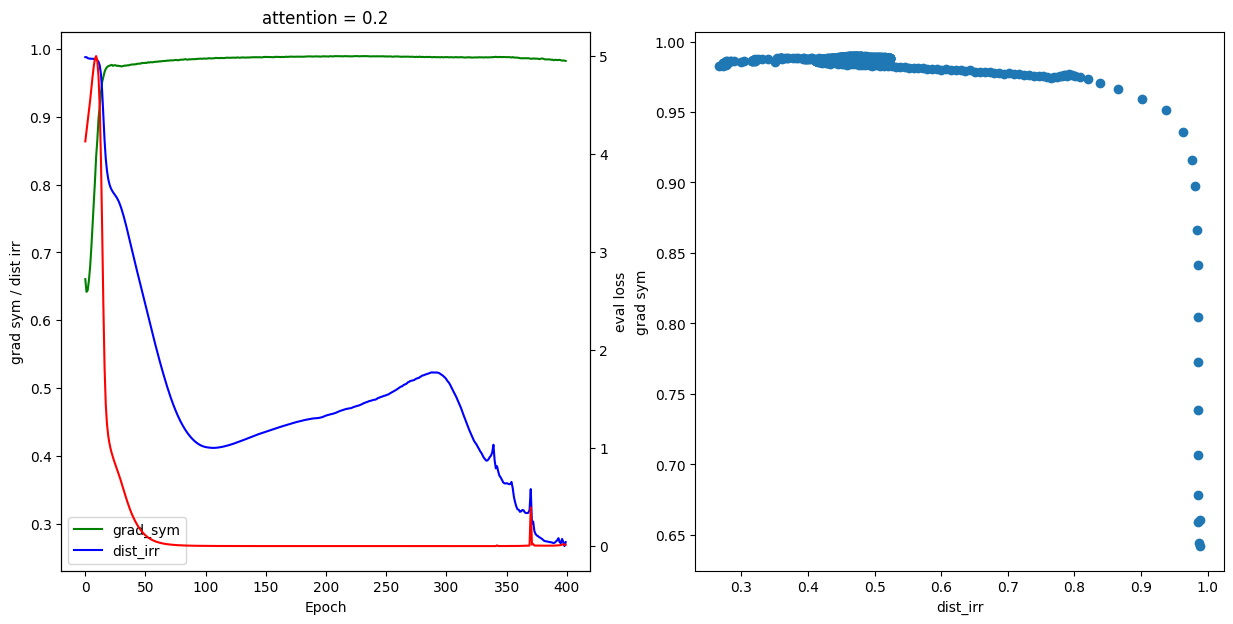

In [391]:
pizza_clock_plot("0.2",parent_dir)

### Model with attention = 0.4

In [24]:
max_components = 8
cov_type = "diag"
n_seeds = 4
n_iter = 10
attn = 0.4


# cols = ['l1', 'l2','grad_sym', 'train_loss', 'eval_loss', 'train_accuracy',
#        'eval_accuracy']

cols = [
        'mean_lambda','grad_sym',
       'train_loss', 'train_accuracy']

first_n = 400
hmm_model = HMM(max_components, cov_type, n_seeds, n_iter)
data_dir = parent_dir + f"/modular_clock_pizza_run_{attn}/"
hmm_output = hmm_model.get_avg_log_likelihood(data_dir, cols)

visualize_avg_log_likelihood(hmm_output,"select cols - modular_clock_pizza_run_0.4")

# model_path = data_dir + '/model_select_metrics'
# save_model(model_path,hmm_output)

all_metrics/modular_clock_pizza_run_0.4/
['all_metrics/modular_clock_pizza_run_0.4/lr0.001_adamw_seed2_scaling1.0.csv', 'all_metrics/modular_clock_pizza_run_0.4/lr0.001_adamw_seed3_scaling1.0.csv', 'all_metrics/modular_clock_pizza_run_0.4/lr0.001_adamw_seed1_scaling1.0.csv', 'all_metrics/modular_clock_pizza_run_0.4/lr0.001_adamw_seed0_scaling1.0.csv']


100%|██████████| 8/8 [00:00<00:00,  9.17it/s]


In [448]:
hmm_model.best_model

GaussianHMM(n_components=7)

In [451]:
hmm_output['best_models'][4]

GaussianHMM(n_components=5)

In [452]:
n_components = 5
model_path = data_dir + '/model_select_metrics.pkl'
model, data, best_predictions, lengths = munge_data(hmm_model, model_path, data_dir, cols, n_components)

phases = list(set(hmm_output['best_models'][4].predict(data, lengths=lengths)))
state_transitions = hmm_model.feature_importance(cols, data, best_predictions,phases,lengths)
best_model_transmat = model.transmat_

visualize_dag(best_model_transmat, edge_hover_dict = state_transitions)

all_metrics/modular_clock_pizza_run_0.4/
['all_metrics/modular_clock_pizza_run_0.4/lr0.001_adamw_seed2_scaling1.0.csv', 'all_metrics/modular_clock_pizza_run_0.4/lr0.001_adamw_seed3_scaling1.0.csv', 'all_metrics/modular_clock_pizza_run_0.4/lr0.001_adamw_seed1_scaling1.0.csv', 'all_metrics/modular_clock_pizza_run_0.4/lr0.001_adamw_seed0_scaling1.0.csv']
13541.579610399956


In [455]:
random_seed = 0
optimizer = "adamw"
lr = 0.001
scaling = 1.0
attn = 0.4
data_dir = parent_dir + f"/modular_clock_pizza_run_{attn}/"


training_run = pd.read_csv(f'{data_dir}lr{lr}_{optimizer}_seed{random_seed}_scaling{scaling}.csv')
data  = np.apply_along_axis(zscore, 0, training_run[cols].to_numpy())
training_run['phases']= hmm_model.best_model.predict(data) + 1
training_run['pizza_clock_labels'] = pizza_clock_classification(training_run['grad_sym'], training_run['dist_irr'])
# training_run['phases']= hmm_model.best_model.predict(data)

visualize_hmm_loss(training_run,phase_col = 'phases', epoch_col='epoch', loss_col='train_loss')
visualize_hmm_loss(training_run,phase_col = 'pizza_clock_labels', epoch_col='epoch', loss_col='train_loss')


In [456]:
visualize_hmm_loss(training_run,phase_col = 'phases', epoch_col='epoch', loss_col='train_accuracy')
visualize_hmm_loss(training_run,phase_col = 'pizza_clock_labels', epoch_col='epoch', loss_col='train_accuracy')

In [457]:
visualize_hmm_loss(training_run,phase_col = 'phases', epoch_col='epoch', loss_col='grad_sym')
visualize_hmm_loss(training_run,phase_col = 'pizza_clock_labels', epoch_col='epoch', loss_col='grad_sym')

In [458]:
visualize_hmm_loss(training_run,phase_col = 'phases', epoch_col='epoch', loss_col='mean_lambda')
visualize_hmm_loss(training_run,phase_col = 'pizza_clock_labels', epoch_col='epoch', loss_col='mean_lambda')

### Model with attention = 0.6

In [30]:
max_components = 8
cov_type = "diag"
n_seeds = 4
n_iter = 10
attn = 0.6
# cols = ['l1', 'l2', 'median_b', 'grad_sym',
#         'train_loss', 'train_accuracy']

cols = [   
        'train_loss',  'train_accuracy',
       'eval_accuracy']

first_n = 400
hmm_model = HMM(max_components, cov_type, n_seeds, n_iter)
data_dir = parent_dir + f"/modular_clock_pizza_run_{attn}/"
hmm_output = hmm_model.get_avg_log_likelihood(data_dir, cols)

visualize_avg_log_likelihood(hmm_output,"select cols - modular_clock_pizza_run_0.6")

# model_path = data_dir + '/model_select_metrics'
# save_model(model_path,hmm_output)

all_metrics/modular_clock_pizza_run_0.6/
['all_metrics/modular_clock_pizza_run_0.6/lr0.001_adamw_seed2_scaling1.0.csv', 'all_metrics/modular_clock_pizza_run_0.6/lr0.001_adamw_seed3_scaling1.0.csv', 'all_metrics/modular_clock_pizza_run_0.6/lr0.001_adamw_seed1_scaling1.0.csv', 'all_metrics/modular_clock_pizza_run_0.6/lr0.001_adamw_seed0_scaling1.0.csv']


100%|██████████| 8/8 [00:00<00:00, 12.77it/s]


In [6]:
hmm_model.best_model

GaussianHMM(n_components=2)

In [7]:
n_components = 2
model_path = data_dir + '/model_select_metrics.pkl'
model, data, best_predictions, lengths = munge_data(hmm_model, model_path, data_dir, cols, n_components)

phases = list(set(hmm_model.best_model.predict(data, lengths=lengths)))
state_transitions = hmm_model.feature_importance(cols, data, best_predictions,phases,lengths)
best_model_transmat = model.transmat_

visualize_dag(best_model_transmat, edge_hover_dict = state_transitions)

all_metrics/modular_clock_pizza_run_0.6/
['all_metrics/modular_clock_pizza_run_0.6/lr0.001_adamw_seed2_scaling1.0.csv', 'all_metrics/modular_clock_pizza_run_0.6/lr0.001_adamw_seed3_scaling1.0.csv', 'all_metrics/modular_clock_pizza_run_0.6/lr0.001_adamw_seed1_scaling1.0.csv', 'all_metrics/modular_clock_pizza_run_0.6/lr0.001_adamw_seed0_scaling1.0.csv']
11832.636045247875


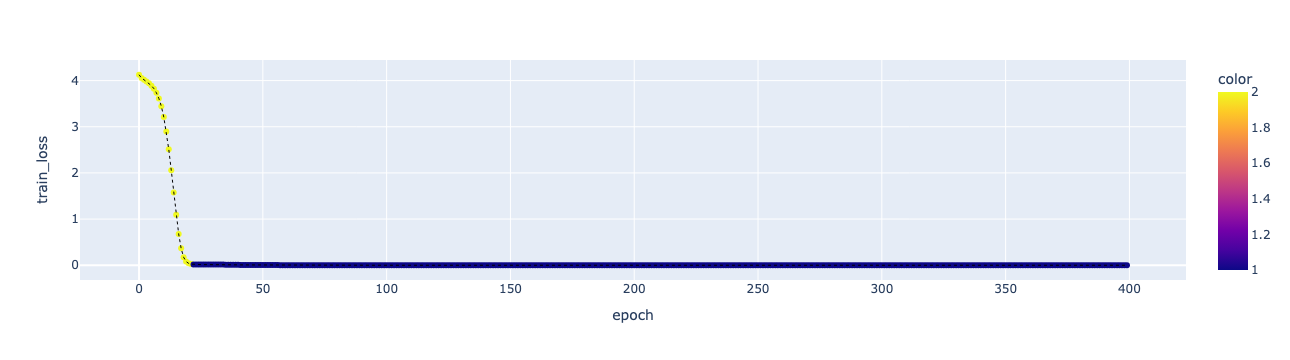

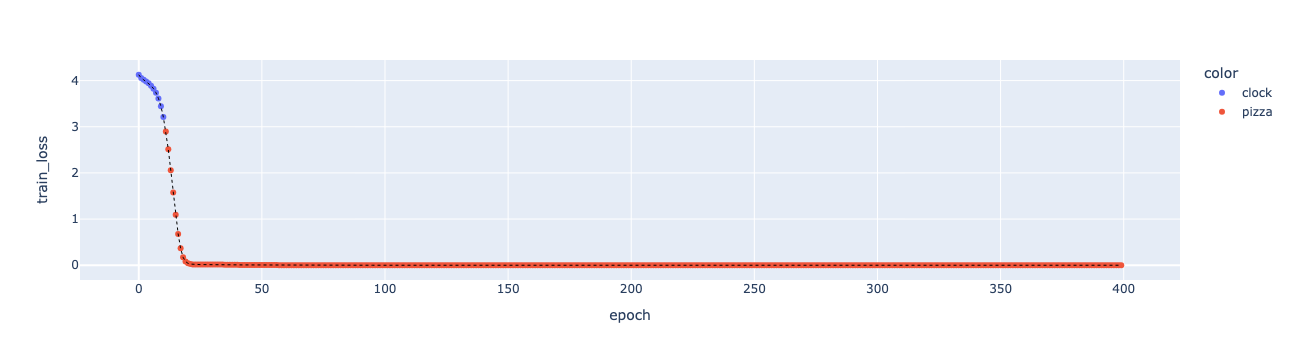

In [8]:
random_seed = 0
optimizer = "adamw"
lr = 0.001
scaling = 1.0
attn = 0.6
data_dir = parent_dir + f"/modular_clock_pizza_run_{attn}/"


training_run = pd.read_csv(f'{data_dir}lr{lr}_{optimizer}_seed{random_seed}_scaling{scaling}.csv')
data  = np.apply_along_axis(zscore, 0, training_run[cols].to_numpy())
training_run['phases']= hmm_model.best_model.predict(data) + 1
training_run['pizza_clock_labels'] = pizza_clock_classification(training_run['grad_sym'], training_run['dist_irr'])
# training_run['phases']= hmm_model.best_model.predict(data)

visualize_hmm_loss(training_run,phase_col = 'phases', epoch_col='epoch', loss_col='train_loss')
visualize_hmm_loss(training_run,phase_col = 'pizza_clock_labels', epoch_col='epoch', loss_col='train_loss')


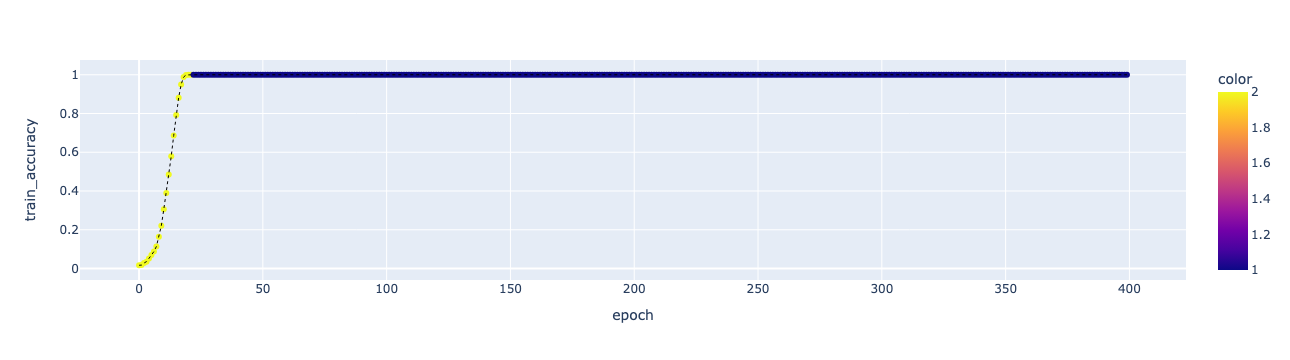

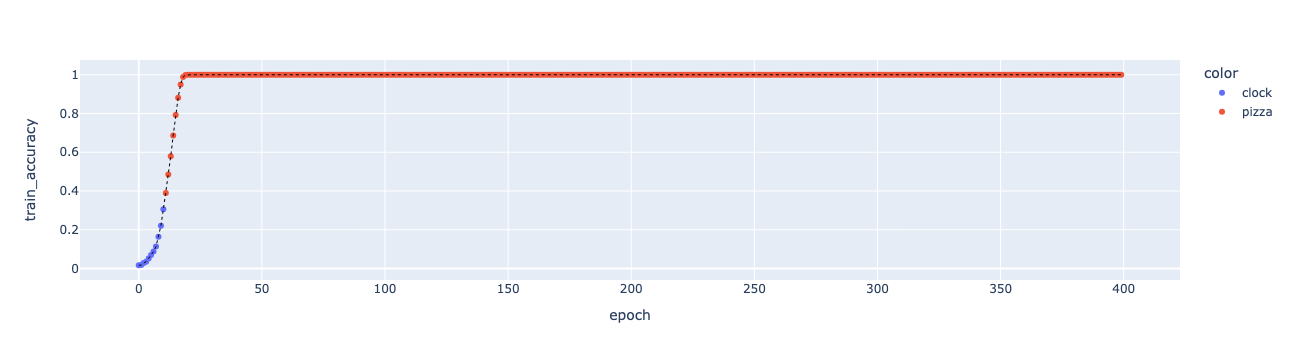

In [9]:
visualize_hmm_loss(training_run,phase_col = 'phases', epoch_col='epoch', loss_col='train_accuracy')
visualize_hmm_loss(training_run,phase_col = 'pizza_clock_labels', epoch_col='epoch', loss_col='train_accuracy')

### Model with attention = 0.8

In [37]:
max_components = 8
cov_type = "diag"
n_seeds = 4
n_iter = 10
attn = 0.8
# cols = ['l1', 'l2', 'grad_sym',
#         'train_loss', 'train_accuracy']

cols = [   
       
       'grad_sym',
        'train_loss',  'train_accuracy',
       ]

first_n = 400
hmm_model = HMM(max_components, cov_type, n_seeds, n_iter)
data_dir = parent_dir + f"/modular_clock_pizza_run_{attn}/"
hmm_output = hmm_model.get_avg_log_likelihood(data_dir, cols)

visualize_avg_log_likelihood(hmm_output,"select cols - modular_clock_pizza_run_0.8")

# model_path = data_dir + '/model_select_metrics'
# save_model(model_path,hmm_output)

all_metrics/modular_clock_pizza_run_0.8/
['all_metrics/modular_clock_pizza_run_0.8/lr0.001_adamw_seed2_scaling1.0.csv', 'all_metrics/modular_clock_pizza_run_0.8/lr0.001_adamw_seed3_scaling1.0.csv', 'all_metrics/modular_clock_pizza_run_0.8/lr0.001_adamw_seed1_scaling1.0.csv', 'all_metrics/modular_clock_pizza_run_0.8/lr0.001_adamw_seed0_scaling1.0.csv']


100%|██████████| 8/8 [00:00<00:00, 10.05it/s]


In [50]:
hmm_model.best_model

GaussianHMM(n_components=7)

In [51]:
hmm_output['best_models'][4]

GaussianHMM(n_components=5)

In [52]:
n_components = 5
model_path = data_dir + '/model_select_metrics.pkl'
model, data, best_predictions, lengths = munge_data(hmm_model, model_path, data_dir, cols, n_components)

phases = list(set(hmm_output['best_models'][4].predict(data, lengths=lengths)))
state_transitions = hmm_model.feature_importance(cols, data, best_predictions,phases,lengths)
best_model_transmat = model.transmat_

visualize_dag(best_model_transmat, edge_hover_dict = state_transitions)

all_metrics/modular_clock_pizza_run_0.8/
['all_metrics/modular_clock_pizza_run_0.8/lr0.001_adamw_seed2_scaling1.0.csv', 'all_metrics/modular_clock_pizza_run_0.8/lr0.001_adamw_seed3_scaling1.0.csv', 'all_metrics/modular_clock_pizza_run_0.8/lr0.001_adamw_seed1_scaling1.0.csv', 'all_metrics/modular_clock_pizza_run_0.8/lr0.001_adamw_seed0_scaling1.0.csv']
11183.39434692165


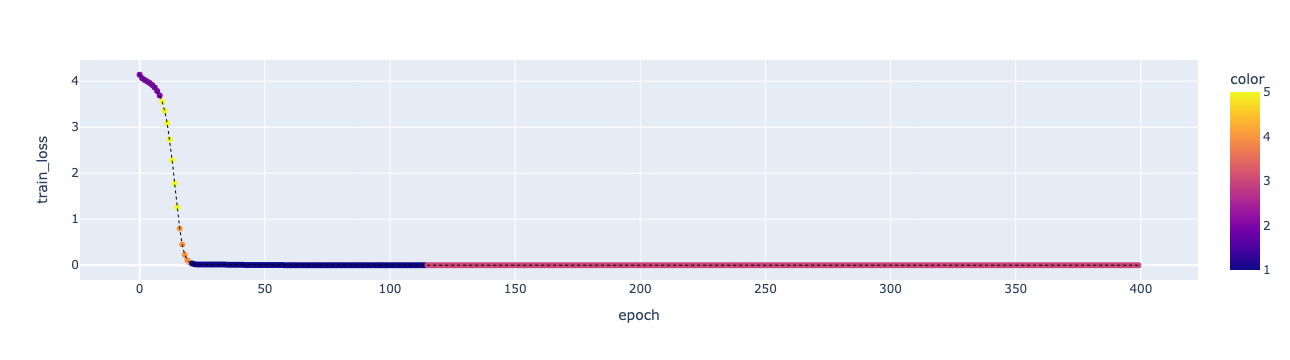

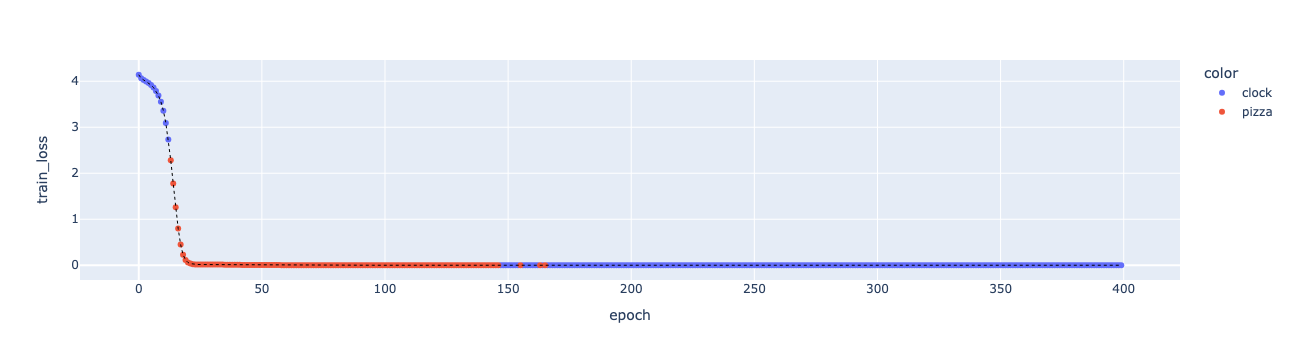

In [53]:
random_seed = 0
optimizer = "adamw"
lr = 0.001
scaling = 1.0
attn = 0.8
data_dir = parent_dir + f"/modular_clock_pizza_run_{attn}/"


training_run = pd.read_csv(f'{data_dir}lr{lr}_{optimizer}_seed{random_seed}_scaling{scaling}.csv')
data  = np.apply_along_axis(zscore, 0, training_run[cols].to_numpy())
training_run['phases']= hmm_output['best_models'][4].predict(data) + 1
training_run['pizza_clock_labels'] = pizza_clock_classification(training_run['grad_sym'], training_run['dist_irr'])
# training_run['phases']= hmm_model.best_model.predict(data)

visualize_hmm_loss(training_run,phase_col = 'phases', epoch_col='epoch', loss_col='train_loss')
visualize_hmm_loss(training_run,phase_col = 'pizza_clock_labels', epoch_col='epoch', loss_col='train_loss')


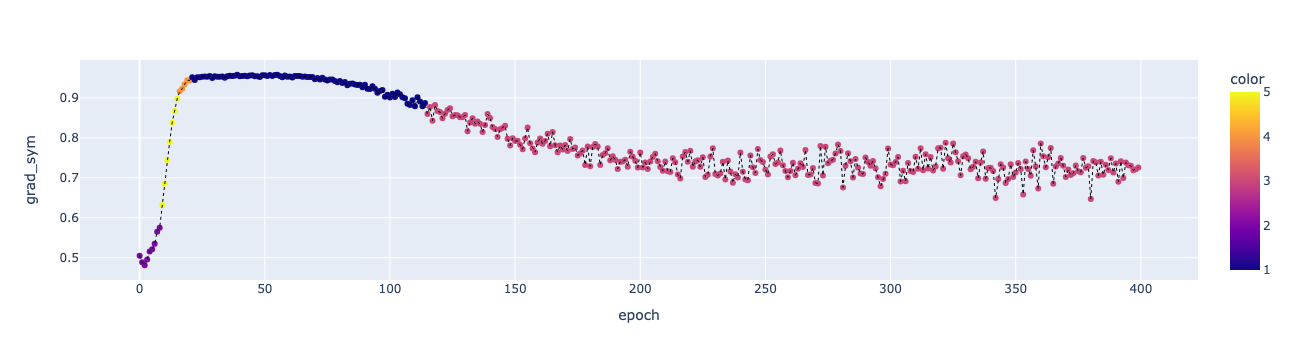

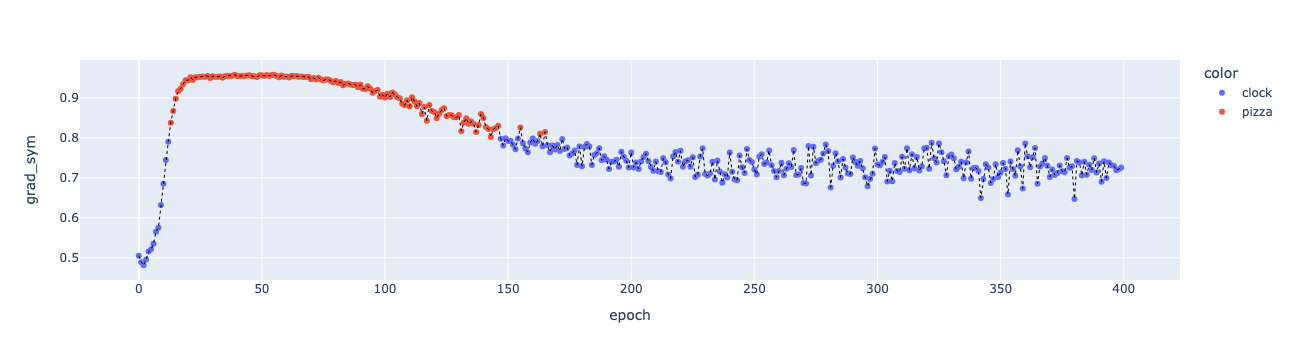

In [54]:
visualize_hmm_loss(training_run,phase_col = 'phases', epoch_col='epoch', loss_col='grad_sym')
visualize_hmm_loss(training_run,phase_col = 'pizza_clock_labels', epoch_col='epoch', loss_col='grad_sym')

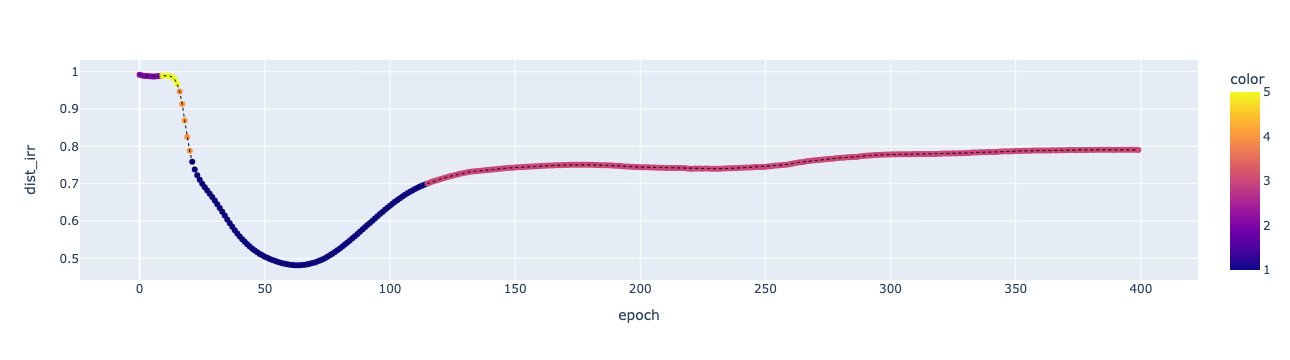

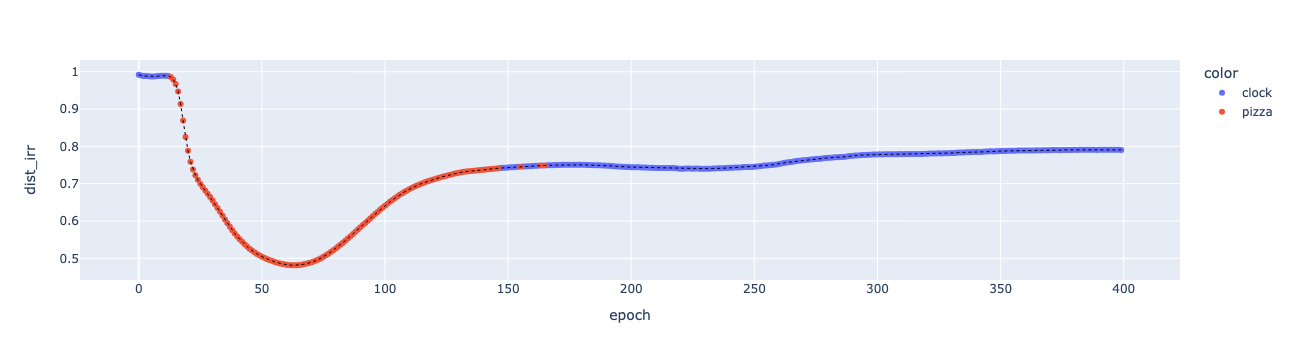

In [55]:
visualize_hmm_loss(training_run,phase_col = 'phases', epoch_col='epoch', loss_col='dist_irr')
visualize_hmm_loss(training_run,phase_col = 'pizza_clock_labels', epoch_col='epoch', loss_col='dist_irr')

### model with attention = 1

In [47]:
max_components = 8
cov_type = "diag"
n_seeds = 4
n_iter = 10
attn = 1

cols = ['l2',
        'mean_lambda', 
      'train_loss',  'train_accuracy','eval_loss','l1']

first_n = 400
hmm_model = HMM(max_components, cov_type, n_seeds, n_iter)
data_dir = parent_dir + f"/modular_clock_pizza_run_{attn}/"
hmm_output = hmm_model.get_avg_log_likelihood(data_dir, cols)

visualize_avg_log_likelihood(hmm_output,"select metrics - modular_clock_pizza_run_1")

model_path = data_dir + '/model_select_metrics'
save_model(model_path,hmm_output)

all_metrics/modular_clock_pizza_run_1/
['all_metrics/modular_clock_pizza_run_1/lr0.001_adamw_seed2_scaling1.0.csv', 'all_metrics/modular_clock_pizza_run_1/lr0.001_adamw_seed3_scaling1.0.csv', 'all_metrics/modular_clock_pizza_run_1/lr0.001_adamw_seed1_scaling1.0.csv', 'all_metrics/modular_clock_pizza_run_1/lr0.001_adamw_seed0_scaling1.0.csv']


100%|██████████| 8/8 [00:00<00:00,  8.01it/s]


In [99]:
hmm_model.best_model

GaussianHMM(n_components=8)

In [48]:
hmm_output['best_models'][6]

GaussianHMM(n_components=7)

In [50]:
n_components = 7
model_path = data_dir + '/model_select_metrics.pkl'
model, data, best_predictions, lengths = munge_data(hmm_model, model_path, data_dir, cols, n_components)

phases = list(set(hmm_output['best_models'][6].predict(data, lengths=lengths)))
state_transitions = hmm_model.feature_importance(cols, data, best_predictions,phases,lengths)
best_model_transmat = model.transmat_

visualize_dag(best_model_transmat, edge_hover_dict = state_transitions)

all_metrics/modular_clock_pizza_run_1/
['all_metrics/modular_clock_pizza_run_1/lr0.001_adamw_seed2_scaling1.0.csv', 'all_metrics/modular_clock_pizza_run_1/lr0.001_adamw_seed3_scaling1.0.csv', 'all_metrics/modular_clock_pizza_run_1/lr0.001_adamw_seed1_scaling1.0.csv', 'all_metrics/modular_clock_pizza_run_1/lr0.001_adamw_seed0_scaling1.0.csv']
14381.36474049973


In [51]:
random_seed = 0
optimizer = "adamw"
lr = 0.001
scaling = 1.0
attn = 1
data_dir = parent_dir + f"/modular_clock_pizza_run_{attn}/"


training_run = pd.read_csv(f'{data_dir}lr{lr}_{optimizer}_seed{random_seed}_scaling{scaling}.csv')
data  = np.apply_along_axis(zscore, 0, training_run[cols].to_numpy())
training_run['phases']= hmm_output['best_models'][6].predict(data) + 1
training_run['pizza_clock_labels'] = pizza_clock_classification(training_run['grad_sym'], training_run['dist_irr'])
# training_run['phases']= hmm_model.best_model.predict(data)

visualize_hmm_loss(training_run,phase_col = 'phases', epoch_col='epoch', loss_col='train_loss')
visualize_hmm_loss(training_run,phase_col = 'pizza_clock_labels', epoch_col='epoch', loss_col='train_loss')


In [52]:
visualize_hmm_loss(training_run,phase_col = 'phases', epoch_col='epoch', loss_col='eval_loss')
visualize_hmm_loss(training_run,phase_col = 'pizza_clock_labels', epoch_col='epoch', loss_col='eval_loss')

In [53]:
visualize_hmm_loss(training_run,phase_col = 'phases', epoch_col='epoch', loss_col='l2')
visualize_hmm_loss(training_run,phase_col = 'pizza_clock_labels', epoch_col='epoch', loss_col='l2')

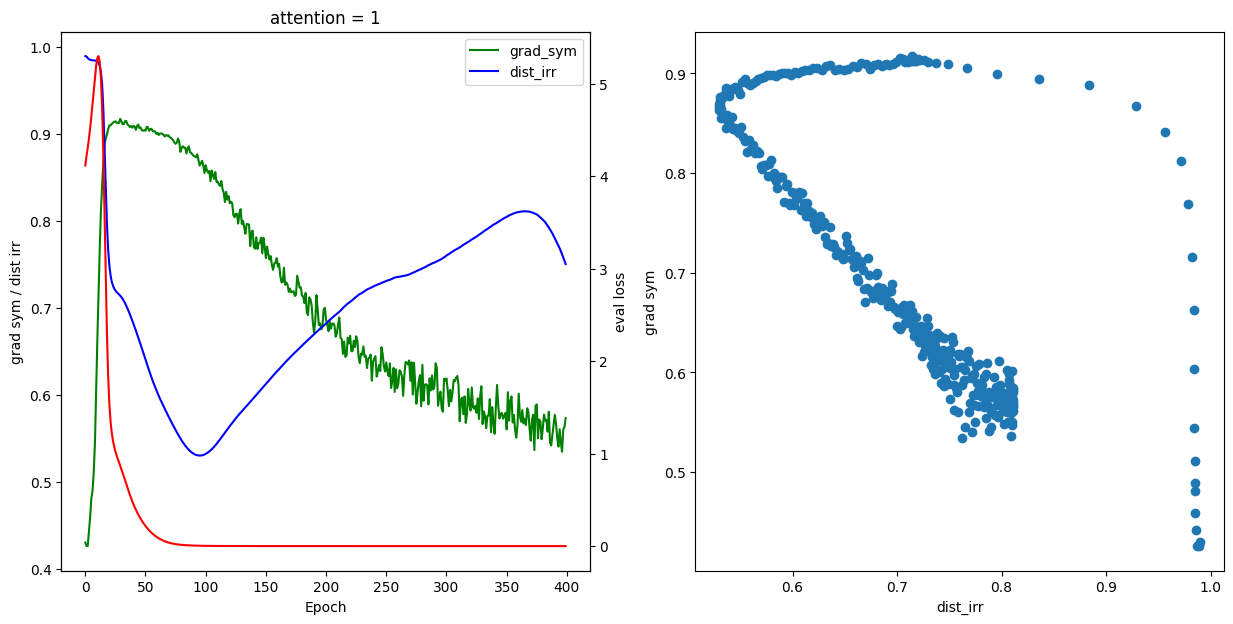

In [34]:
pizza_clock_plot("1",parent_dir)